In this notebook, we aim at quantifying the non-linearity of the
AC Power Flow datasets.

In [1]:
import os
os.chdir('..')

import numpy as np

In [2]:
# Select dataset
data_dir = 'datasets/acpf_14'
#data_dir = 'datasets/linear_systems'

# Load the train set
mode = 'train'

# Import numpy data
A_train = np.load(os.path.join(data_dir, 'A_'+mode+'.npy'))
B_train = np.load(os.path.join(data_dir, 'B_'+mode+'.npy'))
U_train = np.load(os.path.join(data_dir, 'U_'+mode+'.npy'))

In [3]:
n_samples = np.shape(A_train)[0]

A_train_flat = np.reshape(A_train, [n_samples, -1])
B_train_flat = np.reshape(B_train, [n_samples, -1])
U_train_flat = np.reshape(U_train, [n_samples, -1])

X = np.concatenate((A_train_flat, B_train_flat), axis=1)
Y = U_train_flat

In [4]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

In [5]:
# Load the train set
mode = 'test'

# Import numpy data
A_test = np.load(os.path.join(data_dir, 'A_'+mode+'.npy'))
B_test = np.load(os.path.join(data_dir, 'B_'+mode+'.npy'))
U_test = np.load(os.path.join(data_dir, 'U_'+mode+'.npy'))

n_samples = np.shape(A_test)[0]

A_test_flat = np.reshape(A_test, [n_samples, -1])
B_test_flat = np.reshape(B_test, [n_samples, -1])
U_test_flat = np.reshape(U_test, [n_samples, -1])

X_test = np.concatenate((A_test_flat, B_test_flat), axis=1)
Y_test = U_test_flat


In [6]:
pred_test = regr.predict(X_test)
pred_test = np.reshape(pred_test, U_test.shape)
pred_Vm_test = np.reshape(pred_test[:,:,0], -1)
pred_Va_test = np.reshape(pred_test[:,:,1], -1)

gt_Vm_test = np.reshape(U_test[:,:,0], -1)
gt_Va_test = np.reshape(U_test[:,:,1], -1)

print(np.corrcoef(pred_Vm_test, gt_Vm_test))
print(np.corrcoef(pred_Va_test, gt_Va_test))

[[1.         0.99940864]
 [0.99940864 1.        ]]
[[1.         0.99599181]
 [0.99599181 1.        ]]


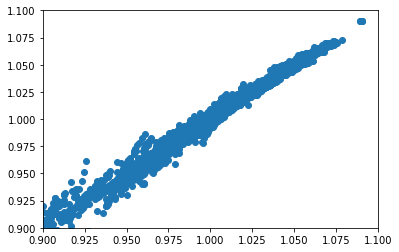

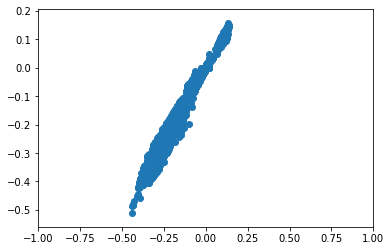

In [7]:
import matplotlib.pyplot as plt

plt.scatter(pred_Vm_test, gt_Vm_test)
plt.ylim([0.9, 1.1])
plt.xlim([0.9, 1.1])
plt.show()

plt.scatter(pred_Va_test, gt_Va_test)
plt.xlim([-1, 1])
plt.show()